* Understanding the Problem.
Looking at the notebook, it mentions things like 5 Whys decomposition, etc for properly breaking down the problem for understanding and problem scoping. I think I'll try out the Five Whys for time's sake.
** Why am I doing this? To find a solution to quickly & accurately diagnosing breast cancer.
** Why? Because often such symptoms of breast cancer can be hard to detect or might lead to false positives, leading to a misuse of time & resources.
** Why? It could be due to a lack of understanding of the possible correlations between certain symptoms and breast cancer.
Well maybe only three whys, but I now know the importance behind the goal of finding at least the correlations between symptoms and breast cancer.

* Data Setup
** Data Acquisition & Exploration.
Due to me being given the dataset, I don't have to go looking for it; but if I were to have to, I'd consider research organizations, open-source datasets/kaggle, or maybe just asking the client that this is for to supply some. Besides this, I can move towards exploring the data to make sure the set is clean and properly labeled.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("/home/nate/NextCloud/Roam/Classes/Intro_to_ML/assignmnets/week_13/[Dataset]_BreastCancer.csv")

print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99           NaN          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa


*** After printing some of the features and observations, I don't find anything 'dirty' but I should try doing a more direct search for missing values within the dataset.

In [2]:
print(df.isnull().values.sum())
print(df.isnull().sum())

28
id                         0
diagnosis                  0
radius_mean                0
texture_mean               1
perimeter_mean             1
area_mean                  0
smoothness_mean            0
compactness_mean           1
concavity_mean             1
concave points_mean        1
symmetry_mean              0
fractal_dimension_mean     3
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              3
compactness_se             4
concavity_se               2
concave points_se          1
symmetry_se                3
fractal_dimension_se       0
radius_worst               1
texture_worst              3
perimeter_worst            0
area_worst                 2
smoothness_worst           1
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


To take note of what I did to figure out what I've just found, I had first printed the sum of values which are null within the complete dataframe, showing me the columns which have such observations. Second, I had printed the sum of total null values within those columns, showing how many observations are empty.

For time's sake and due to the large amount of other features with filled-in observations, I'm going to drop these null values within their respective rows for clean up.

In [3]:
df.dropna(inplace=True)
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
5      843786         M        12.45         15.70           82.57      477.1   
..        ...       ...          ...           ...             ...        ...   
563    926125         M        20.92         25.09          143.00     1347.0   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa


where I can see that I had dropped around 30+ rows!

*** Modifying the Target Column
Looking through the dataset, I find that there doesn't exist a pre-defined 'target' column which will be important later for ease of identification during model use; as well, such a column needs to be in the proper format, like numerical, in order to be used in certain models.

target
B    342
M    201
Name: count, dtype: int64


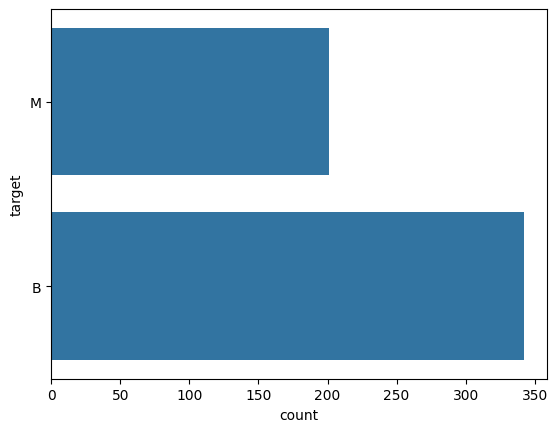

In [4]:
df = df.rename(columns={'diagnosis':'target'})

sns.countplot(df['target'])
print(df.target.value_counts())

So it can be seen that this is done by re-declaring the 'df' object as the result of the method 'rename' which exchanges the column's name 'diagnosis' to 'target'; then I just went and used seaborn to create a simple count plot to show the observations attached to the feature. Notice though how this is the count of B & M, which is to say such observations are not numerical but rather categorical, and here I was just counting the amount of such categorical observations.

This means I have to convert such a binary classification to just that: binary integers.

In [5]:
df['target'] = [1 if i.strip()=='M' else 0 for i in df.target]

*** Correlation & Feature Selection.
Finding the correlation between different features within the dataset will help to find such features that are worth looking into and playing with within the models used later; though, with such a dataset with this large of features, it would be better to filter for only the features that reach some high threshold of being correlated with each other, giving a more clear picture of the heavy hitters.

Text(0.5, 1.0, "Target's Correlations Greater then 0.75")

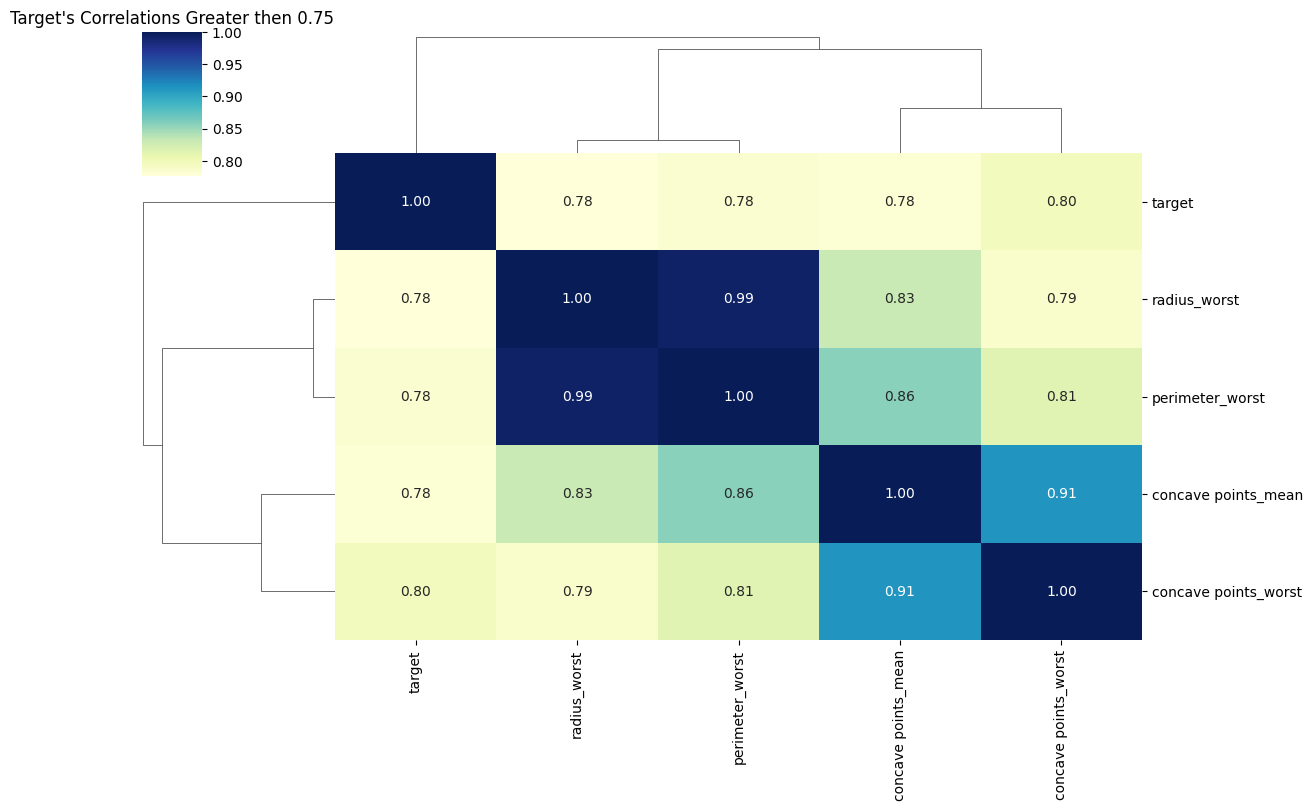

In [6]:
th = 0.75
corr = df.corr()
filt = np.abs(corr['target']) > th

corr_features = corr.columns[filt].tolist()
sns.clustermap(df[corr_features].corr(), annot=True, fmt='.2f', figsize=(12,8), cmap='YlGnBu')
plt.title("Target's Correlations Greater then " + str(th))

Just to go through this a bit, the main action of filtering resides in the object 'corr_features' where I had assigned the filtered columns to the 'corr' object and made such an instance 'corr_features' out of 'corr'.

With this done, I know a bit more what I could see out of the models once trained & tested.
*** Splitting into sets
From here I can start to split the dataframe/set into the needed subsets for training and testing, split by their axes.

In [7]:
X = df.drop(['target'], axis=1)
y = df['target']
columns = X.columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print('X_train.shape:', X_train.shape)
print('X_test.shape', X_test.shape)

X_train.shape: (434, 31)
X_test.shape (109, 31)



not bad, but the difference between those features is insane: I'll standardize the data to decrease this difference.

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df["target"] = y_train

print('X_train.shape:', X_train.shape)
print('X_test.shape', X_test.shape)

X_train.shape: (434, 31)
X_test.shape (109, 31)


Before moving forward, it might be a good question to ask two things
- What exactly am I standardizing?
  The values which were standardized was rather the scale of the data rather than the values of the data itself. If one were to look through the data, they would see some of the values being of a very small decimal while others of large integers: that can be a bit of a problem when performing analysis. 
- Why did I set y_train but not y_test to the 'target' feature?
  y_train was assigned here due to it needing to be re-assigned after standardization; y_test is just the original set.

* Modeling
Finally the fun part, and also the most quickest (how surprising), is running the three models in order to compare the differences between them. Within class, it was hinted that Decision Trees, one of the models to be ran, should be the most effective in predicting such binary classification. I could see how this might be so due to the similar style which we (us humans) do when diagnosing: it's been working pretty well so far. The other two models I'll be running is SVM and K-NN.

In [11]:
clf_knn = KNeighborsClassifier(n_neighbors = 2)
clf_knn.fit(X_train, y_train)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [12]:
clf_svm = SVC(kernel = 'rbf')
clf_svm.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [13]:
clf_dt = DecisionTreeClassifier(random_state = 0)
clf_dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


* Model Comparison
With our models trained, I have to compare such performance between the two. A method of doing this is to use a confusion matrix and print their respective accuracy score for their training and test sets. Some fancy names, but what do they mean?

- Confusion Matrix
  The confusion matrix is often introduced as the four other derived metrics that come out of its table: Accuracy, Precision, Recall, F1 Score. What the matrix is in isolation is simply the four possibilities of a prediction by the model: True Positive, True Negative, False Positive, False Negative. The Trues are what you think they are to be, but the False are the opposite; meaning they are false predictions of a positive outcome (here malignant) but that isn't actually true. 
- Accuracy
  Just one of the derivable metrics from the Confusion Matrix. This is actually the ratio of the sum of all the correct predictions (TP & TN) over the sum of all predictions, giving the quotient representing the right out of all.

Test Score: 0.945, Train Score: 0.97
CM: 
 [[70  0]
 [ 6 33]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        70
           1       1.00      0.85      0.92        39

    accuracy                           0.94       109
   macro avg       0.96      0.92      0.94       109
weighted avg       0.95      0.94      0.94       109



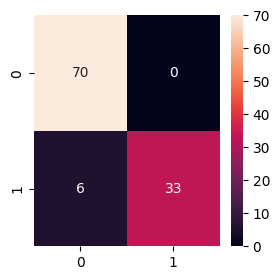

In [14]:
y_pred_test1 = clf_knn.predict(X_test)
y_pred_train1 = clf_knn.predict(X_train)
cm = confusion_matrix(y_test, y_pred_test1)
acc_test = accuracy_score(y_test, y_pred_test1)
acc_train = accuracy_score(y_train, y_pred_train1)

print("Test Score: {}, Train Score: {}".format(round(acc_test,4), round(acc_train, 4)))
print("CM: \n", cm)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred_test1))

Test Score: 0.9817, Train Score: 0.9862
CM: 
 [[70  0]
 [ 2 37]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        70
           1       1.00      0.95      0.97        39

    accuracy                           0.98       109
   macro avg       0.99      0.97      0.98       109
weighted avg       0.98      0.98      0.98       109



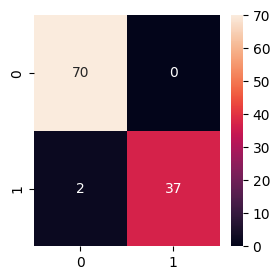

In [15]:
y_pred_test2 = clf_svm.predict(X_test)
y_pred_train2 = clf_svm.predict(X_train)
cm2 = confusion_matrix(y_test, y_pred_test2)
acc_test2 = accuracy_score(y_test, y_pred_test2)
acc_train2 = accuracy_score(y_train, y_pred_train2)

print("Test Score: {}, Train Score: {}".format(round(acc_test2,4), round(acc_train2,4)))
print("CM: \n",cm2)
plt.figure(figsize=(3,3))
sns.heatmap(cm2, annot=True)
print(classification_report(y_test, y_pred_test2))

Test Score: 0.9266, Train Score: 1.0
CM: 
 [[66  4]
 [ 4 35]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        70
           1       0.90      0.90      0.90        39

    accuracy                           0.93       109
   macro avg       0.92      0.92      0.92       109
weighted avg       0.93      0.93      0.93       109



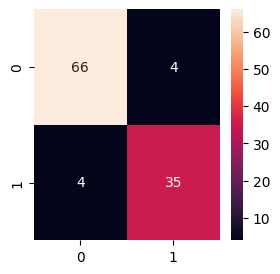

In [16]:
y_pred_test3 = clf_dt.predict(X_test)
y_pred_train3 = clf_dt.predict(X_train)
cm3 = confusion_matrix(y_test, y_pred_test3)
acc_test3 = accuracy_score(y_test, y_pred_test3)
acc_train3 = accuracy_score(y_train, y_pred_train3)

print("Test Score: {}, Train Score: {}".format(round(acc_test3,4), round(acc_train3,4)))
print("CM: \n",cm3)
plt.figure(figsize=(3,3))
sns.heatmap(cm3, annot=True)
print(classification_report(y_test, y_pred_test3))


So before full reflection, I want to go over what I had just done here. It can be seen that I had implemented methods to create, record, and visualize such metrics of Accuracy and the matrix which its derived from. Though they look the same, the differences can be seen between the objects difference by an integer coinciding with the model used. It's interesting to note that,
- The confusion matrix is created from the y_test set and the predictions from the model chosen trained rather than the x_test set; this is the same for every other model.
- Accuracy test are done in a similar fashion as the confusion matrix.

* Reflection
For this reflection portion I'm going to focus on reviewing the metrics discussed before for each model. Looking at the confusion matrix...well it's confusing me. Reading a bit deeper into how this confusion matrix is graphed, the rows are to represent the actual cases that belong to either binary classification (so benign or malignant) while the columns are the predicted cases for which they belong to either of the binary classifications. So looking at the the matrix for the SVM for example, the first row representing the actual cases of the classification of benign show that the model predicted correctly 77 True Negatives as compared to ground truth; as well in this row, the model had erroneously predicted three cases as being in the class of benign (so a False Positive) when really they're negative. Moving onto the second row which represents the actual cases of the classification being malignant, the first column shows zero cases which were erroneously predicted to be negative, while the second column in this comparison shows the model had correctly predicted 29 cases as being positive (so being malignant correctly). This is to all say that the SVM model did a pretty good job at correctly predicting cases to be either a True Negative (so truly having benign breast cancer) or True Positive (having unfortunately malicious breast cancer); but where it really shines is its ability to not achieve any False Negatives, which would create the situation where someone could be told they are without malicious cancer when they really are!

Another metric to note is accuracy. Looking towards the favoured SVM model again, it can be seen that it has an accuracy of 0.97 or rather 97%: that's an impressive metric! High enough to indicate strong prediction while not enough to suggest any overfitting is occurring: but there is more to look into as such a metric can be misleading. Looking at the others, I find
- Precision:
  The ratio of True Positives to the sum of all other positives, being true or false. Its range is from zero to one, where zero means the model fails to have any predicted positives as correct where 1 means every prediction of a positive class was correct. It should be apparent now that Precision measures accuracy of positive predictions made by classification, as it's being done here. Here the Precision for my favoured model is was 96% for benign and 100% or rather 1 for malignant; this would suggest the model has high accuracy for classification of binary tumors and an exceptionally high accuracy for classification of malignant tumors, which seems to coincide with the confusion matrix: the model does not erroneously classify malignant tumors as false negatives while only classifying three cases as being malignant when they were benign (so false positive). I'd note here that Precision helps in measuring the performance of a model's tendency for false positives, which it does do here (though, such a situation here isn't as important as its inverse). 
- Recall:
  Recall is pretty similar to Precision where in it's a ratio measuring correct predictions or classifications, but rather Recall divides the total amount of True Positives by the sum of such positives and False Negatives, basically asking out of all positives cases, which did the model correctly identify? It has a similar range as well, acting with the same case where a value of 1 means the model correctly identified all positive cases whereas a value of zero means no positive cases were identified. Here the recall for the model was 96% for classifications of benign tumors and 100% for malignant; this explains why there wasn't any false negatives. 
- F1-Score:
  Before going into what the F1-Score is, it can actually be seen to be taking in both the precision and recall as defined through their percentages for benign and malignant being 98% and 95% respectively; notice how they are slightly near each other with the class performance of benign being slightly higher as I might expect. The F1-Score is the measurement of assessing class performance of the model, taking in both the desired avoidence of false positives and false negatives: but, there is a trade off between the two thereby seeking one might diminish the other. 

 After going over the three metrics that can be derived from the confusion matrix, there does seem to be measurement proof that the model's accuracy is pushed by the model's performance of classification, where such performance is defined as having a zero rate of false negatives and only a small margin of false positives, but a very high degree of accuracy for correct classification of true positives and true negatives.